<a href="https://colab.research.google.com/github/ritimishra1706/Internship-Projects/blob/main/Titanic_Survival_prediction_minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import normalize, StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [ ]:
titanic_data_train=pd.read_csv('train (2).csv')
titanic_data_test=pd.read_csv('test (1).csv')

In [ ]:
titanic_data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,S


In [ ]:
titanic_data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data_train.shape

(891, 12)

In [ ]:
titanic_data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling the missing values

In [ ]:
# Drop unwanted columns
titanic_data_train=titanic_data_train.drop(columns='Cabin',axis=1)
titanic_data_test=titanic_data_test.drop(columns='Cabin',axis=1)


In [ ]:
#missing_list=list(titanic_data_train.isnull().sum()[titanic_data_train.isnull().sum()>0].index)

In [ ]:
titanic_data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
titanic_data_test.dropna(subset=['Fare'],axis=0,inplace=True)

In [ ]:
titanic_data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
med_val=titanic_data_train['Age'].median()

In [ ]:
med_val

28.0

In [ ]:
titanic_data_train['Age'].fillna(med_val,inplace=True)

In [ ]:
titanic_data_test['Age'].fillna(med_val,inplace=True)

In [ ]:
titanic_data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
print(titanic_data_train['Embarked'].mode())

0    0
dtype: int64


In [ ]:
print(titanic_data_train['Embarked'].mode()[0])

0


In [ ]:
titanic_data_train['Embarked'].fillna(titanic_data_train['Embarked'].mode()[0],inplace=True)

In [ ]:
titanic_data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis


In [ ]:
titanic_data_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [ ]:
titanic_data_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

In [ ]:
sns.set()

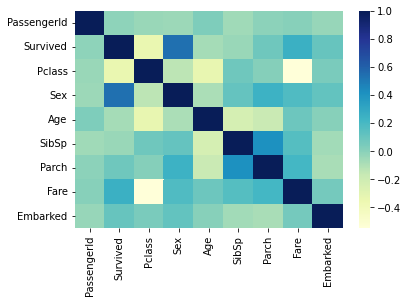

In [ ]:
sns.heatmap(titanic_data_train.corr(),cmap="YlGnBu")
plt.show()

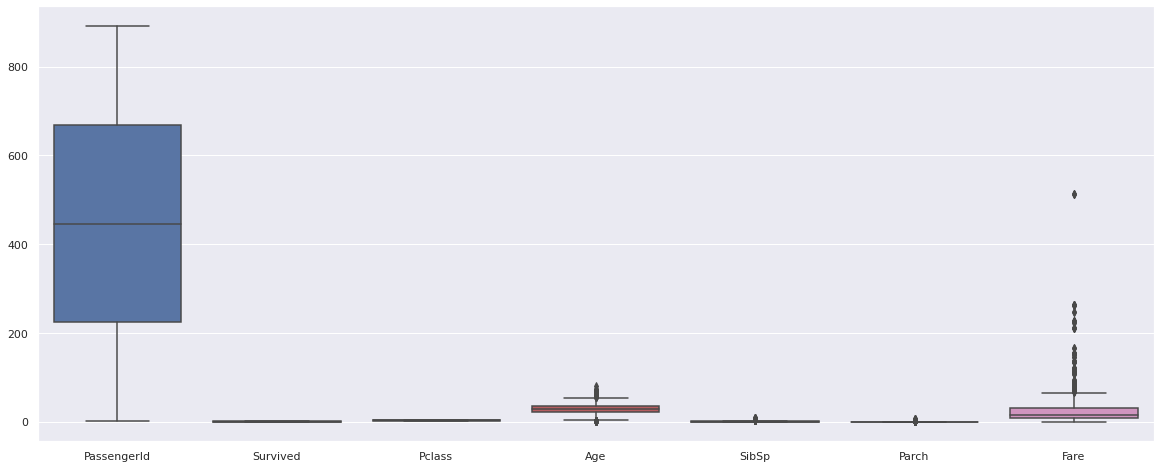

In [ ]:
 #outlier detection

plt.figure(figsize = (20, 8))
sns.boxplot(data = titanic_data_train, width = 0.8)
plt.show()

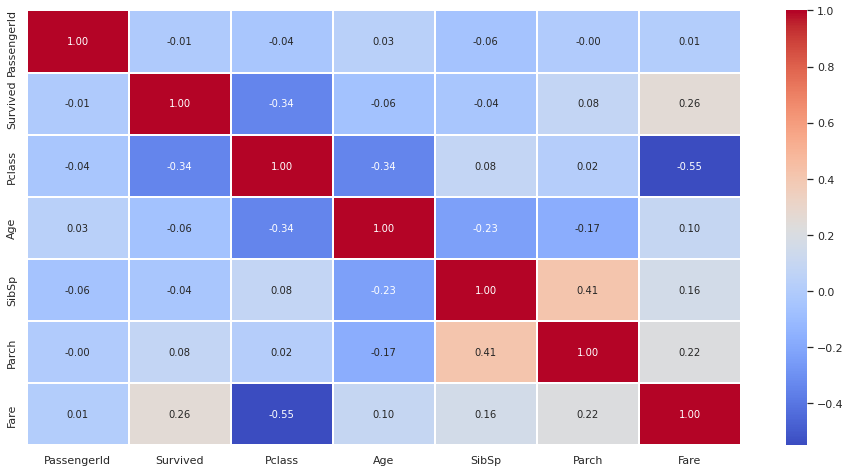

In [ ]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(titanic_data_train.corr(), annot=True, fmt='1.2f', annot_kws={'size' : 10}, linewidth=1, cmap="coolwarm")
plt.show()

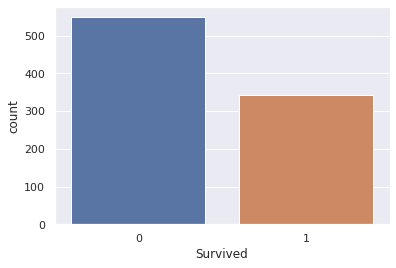

In [ ]:
# 1 means survived person and zero for not survived
sns.countplot('Survived',data=titanic_data_train)


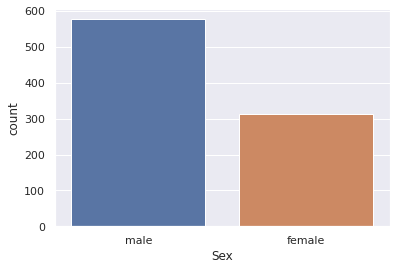

In [ ]:
sns.countplot('Sex',data=titanic_data_train)

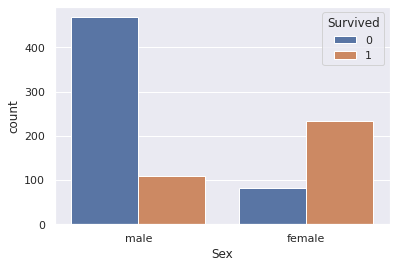

In [ ]:
#this shows how many male and female survived and not survived
sns.countplot('Sex',hue='Survived',data=titanic_data_train)

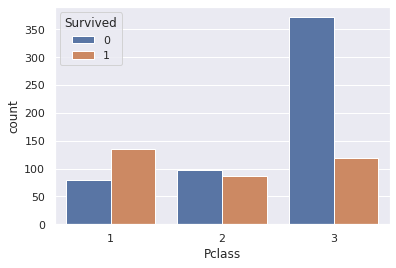

In [ ]:
sns.countplot('Pclass',hue='Survived',data=titanic_data_train)

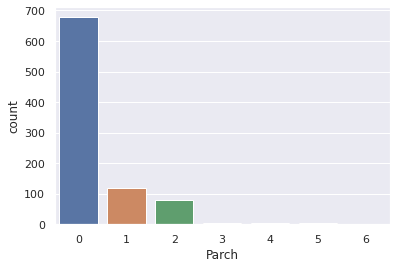

In [ ]:
sns.countplot('Parch',data=titanic_data_train)

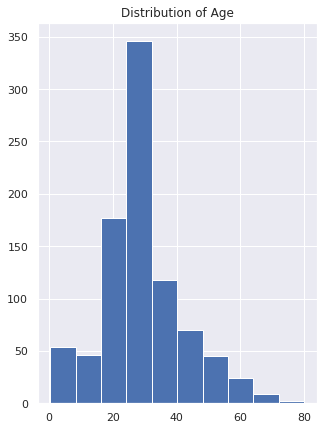

In [ ]:
plt.figure(figsize=(5,7))
plt.hist(titanic_data_train['Age'])
plt.title("Distribution of Age")
plt.xlabel=("Age")
plt.show()

# Working on Categorical Data

In [ ]:
titanic_data_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_data_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Converting categorical data into numerical values because our model can't work on string values

In [ ]:
titanic_data_train.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
titanic_data_test.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
titanic_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating features and target

In [ ]:
X=titanic_data_train.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,28.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


In [ ]:
#Target
Y=titanic_data_train['Survived']

In [ ]:
X_test=titanic_data_test.drop(columns=['PassengerId','Name','Ticket'],axis=1)

# Standardization

In [ ]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(X)
x_test_scaled = ss.transform(X_test)
type(x_train_scaled)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns = X.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns = X_test.columns)

In [ ]:
x_train_scaled_df.shape, x_test_scaled_df.shape

((891, 7), (417, 7))

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X,Y)


LogisticRegression()

# Cross Validation on Data

In [ ]:
from sklearn.model_selection import cross_validate
cv=cross_validate(lr,X,Y,scoring="accuracy",cv=10)
cv['test_score']

array([0.78888889, 0.79775281, 0.74157303, 0.84269663, 0.79775281,
       0.76404494, 0.78651685, 0.78651685, 0.82022472, 0.83146067])

In [ ]:
titanic_data_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [ ]:
# Prediction on test data as we don't have survived column in test data, we can't find accuracy score of test data
Y_pred=lr.predict(X_test)

In [ ]:
Y_pred


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

Accuracy on Train data

In [ ]:
# accuracy on train data
X_train_prediction=lr.predict(X)
train_data_accuracy=accuracy_score(Y,X_train_prediction)
print("Accuracy score of training data : ",train_data_accuracy)

Accuracy score of training data :  0.8013468013468014


# Using Other Models

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
model_cv=LogisticRegressionCV()
model_cv.fit(X,Y)


LogisticRegressionCV()

In [ ]:
# accuracy on train data
X_train_prediction=model_cv.predict(X)
train_data_accuracy=accuracy_score(Y,X_train_prediction)
print("Accuracy score of training data : ",train_data_accuracy)

Accuracy score of training data :  0.8035914702581369


In [ ]:
prediction=model_cv.predict(X_test)

In [ ]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

Cross validation

In [ ]:
from sklearn.model_selection import cross_validate
cv=cross_validate(model_cv,X,Y,scoring="accuracy",cv=5)
cv['test_score']

array([0.7877095 , 0.78651685, 0.79775281, 0.76966292, 0.8258427 ])

Using decisionTreeClassifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X,Y)

DecisionTreeClassifier()

In [ ]:
# accuracy on train data
X_train_prediction=dtc.predict(X)
train_data_accuracy=accuracy_score(Y,X_train_prediction)
print("Accuracy score of training data : ",train_data_accuracy)

Accuracy score of training data :  0.9797979797979798


Cross validation

In [ ]:
from sklearn.model_selection import cross_validate
cv=cross_validate(dtc,X,Y,scoring="accuracy",cv=10)
cv['test_score']

array([0.71111111, 0.80898876, 0.73033708, 0.76404494, 0.83146067,
       0.76404494, 0.80898876, 0.7752809 , 0.85393258, 0.83146067])

In [ ]:
pred=dtc.predict(X_test)

In [ ]:
pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
type(pred)

numpy.ndarray

In [ ]:
pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Conclusion

Here 0 represents the person who did not survive and 1 represents survived.
We can see by using LogisticRegression model and LogisticRegressionCv model we get 80% accuracy on train data, but after applying decisionTreeClassifier we get 97% accuracy on train data. 
By using Logistic Regression max test-score is 83% and by using decision tree classifier we get 85% test-score.